# General equilibrium

## Consumption & labor supply

In the previous lecture, we discussed the consumption & labor supply problem in *partial equilibrium*, i.e., we assumed that the wage was exogenously fixed, and we characterized optimal household choices for this given wage. We now extend this setting to a production economy and study how wages (and the interest rate) are determined in *general equilibrium*.

### Household problem

As before, we assume that households have preferences given by
$$
u(c,h) = \frac{c^{1-\gamma} - 1}{1-\gamma} - \psi \frac{h^{1+1/\theta}}{1+1/\theta}
$$
where $c \geq 0$ is the amount consumed, and $h \geq 0$ (for "hours") is the amount of labor the household wishes to work (the remaining time is then consumed as leisure). 
Assume that households have initial assets $a$ which come in the form of productive capital that enters the production function. The household's budget constraint is therefore given by
$$
c = r \cdot a + w \cdot h
$$
For simplicity, we ignore any savings decision here and assume that households
have the same fixed stock of $a$ each period which is set exogenously as a parameter.

Since all households are identical in this setup, we model the household sector of this economy as a single representative household.

### Firm problem

We assume two factors of production, capital $K$ and labor $L$, which are supplied to firms by households. We assume that the production function has
the 
[Cobb-Douglas form](https://en.wikipedia.org/wiki/Cobb%E2%80%93Douglas_production_function),
$$
Y = z K^{\alpha} L^{1-\alpha}
$$
where $\alpha > 0$ is the elasticity with respect to capital (or the capital share in output), and $z$ is total factor productivity (TFP). Each firm is assumed to maximize profits $\Pi$ which are simply its revenue net of production costs,
$$
\max_{K,~L} \enskip \Pi = z K^{\alpha} L^{1-\alpha} - r K - w L
$$
where one unit of capital commands a return of $r$ and one unit of labor is paid a wage $w$. We normalize the price of the output to one so that revenue and output are identical.

Taking derivatives with respect to $K$ and $L$, we obtain the first-order conditions for the firm's problem:
$$
\begin{aligned}
r &= \alpha z \left(\frac{K}{L}\right)^{\alpha-1} = \alpha z k^{\alpha-1} \\
w &= (1-\alpha) z\left(\frac{K}{L}\right)^{\alpha} = (1-\alpha) z k^{\alpha}
\end{aligned}
$$
where we define the capital-labor ratio as $k \equiv \frac{K}{L}$.
The equation for $w$ can be inverted to get the firm's labor demand function 
$$
L = \left( \frac{w}{(1-\alpha) z} \right)^{-\frac{1}{\alpha}}K
$$
for given $w$ and $K$. We'll be using equation in the code below.

Note that the production function has *constant returns to scale*: doubling inputs $(K,L)$ doubles the output produced.
In addition, we assume that input and output markets are perfectly competitive. In this setting, the firms make zero profits,
and we can model the production sector of the economy as a single representative firm
without loss of generality.

### Equilibrium

The general equilibrium in this economy is a set of quantities $(K,L,Y,c,h)$ and prices $(r,w)$ 
which solve the household's and firm's problem
such that the following market clearing conditions are satisfied:

- Asset market: $K = a$ (capital $a$ supplied by households equals capital $K$ demanded by firms).
- Labor market: $L = h$ (hours $h$ supplied by households equals labor $L$ demanded by firms).
- Goods market: $Y = c$ (the amount of goods $c$ consumed by households equals aggregate output).

Due to Walras' Law, we only have to make sure that two of these markets clear as 
this implies market clearing in the residual market. 

### Analytical solution

Recall the household's first-order condition from the previous lecture: 
$$
c^{-\gamma} = \psi \frac{h^{1/\theta}}{w}
$$
This
condition links optimal consumption to optimal labor supply
and must hold in equilibrium.

By substituting in the firm's FOCs and market clearing conditions, we 
can rewrite it as a single equation in $L$ which can then be solved for 
equilibrium.

1. From the firm's problem, wages can be alternatively written as 
    $$
    w = (1-\alpha) \frac{Y}{L}
    $$
2. Using this expression and the market clearing conditions $c=Y$ and $h=L$,
we obtain
    $$
    Y^{-\gamma} = \psi \frac{L^{1/\theta}}{(1-\alpha)\frac{Y}{L}}
    \Longleftrightarrow (1-\alpha) Y^{1-\gamma}
    = \psi L^{1 + 1/\theta}
    $$
3. Using capital market clearing $a=K$, from the firm's problem we have that
    $$
    Y = z a^{\alpha} L^{1-\alpha}
    $$
    which can be used to substitute out $Y$ to obtain
    $$
    (1-\alpha) \left(z a^{\alpha}\right)^{1-\gamma} L^{(1-\alpha)(1-\gamma)}
    = \psi L^{1 + 1/\theta}
    $$
4. Collecting terms, we find that the equilibrium $L$ is pinned down by
    $$
    L = \left[ \frac{(1-\alpha)\left(z a^{\alpha}\right)^{1-\gamma}}{\psi} 
        \right]^{\frac{1}{1/\theta + \alpha + \gamma - \alpha \gamma}}
    $$

We can use this expression to verify that our numerical solution is correct.

### Numerical solution

Even though this problem has an analytical solution, we now study how to find the equilibrium numerically. While this is not necessary in this case, the structure of the algorithm directly translates to more complex settings which don't have a closed-form solution.

When implementing a numerical solution, we need to decide how to incorporate any 
analytical results into our algorithm. Usually, we'd want to incorporate 
as many analytical equilibrium conditions as possible since 
this speeds up the computation and gives more precise results. In particular,

- We *never* solve **firm problems** such as this one numerically since the 
  solution (given by the firm's first-order conditions) is trivial and well known.

- We often have to solve the **household problem** numerically as more complicated
  household problems don't have an analytical solution.
  This is usually accomplished using a *minimizer*.

- We usually have to solve for the **equilibrium** price vector $(w, r)$ numerically
  as there are no closed-form solutions except for trivial cases. 
  We usually do this using a *root-finder* which varies the candidate equilibrium
  price until it finds a price vector with zero excess demand.

#### Solution algorithm

Our implementation to find the equilibrium in this economy proceeds as follows:

1.  Implement a function $f(w)$ which returns the excess labor demand for a given $w$.
2.  Make an initial guess for the equilibrium wage rate $w_0$.
3.  Call a root-finder to locate the root of $f$ with initial guess $w_0$.
4.  The root-finder will repeatedly call $f$. For each invocation of $f$ with the current guess of $w$,

    1. Compute the optimal firm labor demand $L$ and the implied interest rate $r$ from the firm's first-order conditions.
    2. Solve the household problem for given $(w, r)$ using a minimizer to obtain the optimal labor supply $h$.
    3.  Compute the excess labor demand $L - h$ as the return value of $f$.
5.  Once the root-finder terminates and returns the equilibrium $w$,
    compute and store all other equilibrium quantities and prices.

#### Implementation

As this is a more complex example, it is preferrable to place the implementation in the separate Python module 
[`lecture06_labor.py`](lecture06_labor.py).
For expositional convenience, the following code segments replicate selected code blocks from that file.

As a first step, we define a 
[`data class`](https://docs.python.org/3/library/dataclasses.html)
called `Parameters` to store the problem parameters. This is more convenient and less error prone than passing a whole set of scalar parameter values to each function when the
number of parameters grows large.

We won't be concerned with the details of what a data class is, so 
you can just copy this declaration and adapt it to a specific problem.
Basically, each line of the `class` body defines a model parameter using the syntax:
```
name: type = value
```
where the `type` is a Python type (usually `float`, `int`, `np.ndarray`, ...)
and `value` is the default value given to this parameter.

In [1]:
# Enable automatic reloading of external modules
%load_ext autoreload
%autoreload 2

For the problem outlined above, the definition of the `Parameters` data class looks as follows:

In [2]:
from dataclasses import dataclass
import numpy as np
from scipy.optimize import minimize, root_scalar

@dataclass
class Parameters:
    """
    Container to store the problem's parameters.
    """
    alpha: float = 0.36     # Capital share in production function
    z: float = 1.0          # TFP 
    gamma: float = 2.0      # RRA in utility
    psi: float = 1.0        # Weight on disutility of working
    theta: float = 0.5      # Frisch elasticity of labor supply
    a: float = 5.0          # Initial assets (capital)

A parameter *object* (also called *instance*) can then be created by calling the constructor `Parameters()`:

In [3]:
# Create instance of parameter class
par = Parameters()

Individual model parameters can be accessed (and changed!) as attributes of this object, for example:

In [4]:
# Print alpha parameter value
par.alpha

0.36

Note that you can also change any of the parameters as follows:

In [5]:
# Use log preferences
par.gamma = 1.0

Finally, the `Parameter` instance can be initialized with parameter values that differ from the defaults by simply specifying them as keyword arguments: 

In [6]:
# Create Parameter instance with custom values
par = Parameters(alpha=0.36, gamma=2.0)

Now that you know how to work with data classes, we define the utility function for the household problem. This is the same implementation that we have used repeatedly in this course, but it now takes a `par` argument which contains all the problem's parameters in the `Parameters` object.

In [7]:
def util(c, h, par: Parameters):
    """
    Compute the utility of a given consumption/labor supply choice.

    Parameters
    ----------
    c : float
        Consumption
    h : float
        Hours worked
    par : Parameters
        Parameters for given problem

    Returns
    -------
    u : float
        Utility level

    """

    # Consumption utility
    if par.gamma == 1:
        # Log utility
        u = np.log(c)
    else:
        # General CRRA utility
        u = (c**(1-par.gamma) - 1) / (1-par.gamma)

    # add disutility of labor
    u -= par.psi * h**(1 + 1/par.theta) / (1 + 1/par.theta)

    return u

With the utility function in hand, we implement the function `solve_hh()` which solves the household problem for given prices $(r,w)$ and parameters.

For this purpose, we use the 
[L-BFGS-B minimizer](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-lbfgsb.html) 
from the 
`scipy.optmize` module. The advantage of this algorithm over 
[`minimize_scalar()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize_scalar.html)
is that we don't need to provide an initial bracket (which might
depend on prices and parameters) but can instead specify 
and initial guess using the argument `x0`.

Note that the L-BFGS-B algorithm supports bounds, which we 
specify as the vector `(0, None)` to impose a lower bound $h \geq 0$. Since $h$ is has no upper bound, this is indicated by the second value being `None`. These bounds have to specified as a nested tuple
because `minimize()` implements a multivariate minimizer, so any additional dimension has its own tuple of bounds (we don't use this feature here).

In [8]:
def solve_hh(r, w, par: Parameters):
    """
    Solve household problem for given prices and parameters

    Parameters
    ----------
    r : float
        Return on capital
    w : float
        Wage rate
    par : Parameters
        Parameters for given problem

    Returns
    -------
    c_opt : float 
        Optimal consumption choice
    h_opt : float
        Optimal hours choice
    """

    # Initial guess for h
    h_guess = 0.5

    # Run minimizer to find optimal hours:
    # The budget constraint is inserted directly in the lambda expression.
    res = minimize(
        lambda h: -util(r*par.a + w * h, h, par),
        x0=h_guess,
        method='L-BFGS-B',
        bounds=((0, None), )
    )

    if not res.success:
        print('Minimizer did not terminate successfully')
        print(res.message)
        print(f'  Prices: {r}, {w}')

    # Recover optimal hours choice
    h_opt = res.x[0]
    # Optimal consumption follows from budget constraint
    c_opt = r * par.a + w * h_opt

    return c_opt, h_opt

Next, we implement the function `solve_firm()` which returns the firm's labor demand $L$ for a given wage rate $w$ computed
from the formula derived earlier.
For convenience, this function also returns output $Y$ and the interest rate $r$ implied by $w$ which is required to solve the household problem.

In [9]:
def solve_firm(w, par: Parameters):
    """
    Return the solution to the firm's problem for given wage rate and parameters.

    Parameters
    ----------
    w : float
        Wage rate
    par : Parameters
        Parameters for given problem

    Returns
    -------
    L : float
        Firm labor demand
    Y : float
        Firm output
    r : float
        Interest rate implied by wage rate

    """

    # Capital market clearing condition
    K = par.a

    # Labor demand implied by firm FOC
    L = (w / (1-par.alpha) / par.z)**(-1/par.alpha) * K

    # Optimal capital-labor ratio
    k = K / L

    # Return on capital
    r = par.z * par.alpha * k**(par.alpha - 1)

    # Output
    Y = par.z * K**par.alpha * L**(1-par.alpha)
    
    return L, Y, r

Lastly, we implement the function to be called by the root-finder which returns the excess demand for labor, $L-h$:

In [10]:
def compute_labor_ex_demand(w, par: Parameters):
    """
    Compute excess labor demand for given wage rate and parameters.

    Parameters
    ----------
    w : float
        Wage rate
    par : Parameters
        Parameters for given problem

    Returns
    -------
    ex_demand : float 
        Excess labor demand (firm demand - household supply)
    """

    # Solve firm problem for given wage rate
    L, Y, r = solve_firm(w, par)

    # Optimal household choices for given prices
    c_opt, h_opt = solve_hh(r, w, par)

    # Excess demand for labor
    ex_demand = L - h_opt

    return ex_demand

<div class="alert alert-info">
<h3> Your turn</h3>

Before running the root-finder, we want to visually verify that the excess demand for 
labor is indeed zero for some <tt>w</tt>.

Using the code we just wrote, plot the function <tt>compute_capital_ex_labor()</tt> for 50 points of 
<tt>w</tt> which are uniformly spaced on the interval [0.05, 2].

</div>

Now that our implementation is complete, we call 
[`root_scalar()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root_scalar.html)
to find the root of `compute_labor_ex_demand()`, i.e., 
to find the equilibrium wage $w$ where the excess demand for labor is zero.

We use the `'newton'` method with an initial guess `x0=1`, but could have opted for a bracket-based root-finder such as the default `'brentq'` method as well.

In [11]:
res = root_scalar(
    compute_labor_ex_demand, x0=1, method='newton', args=(par, )
)

It is a good idea to inspect the result object to make sure that the algorithm exited successfully, which is the case here.

In [12]:
# Inspect root-finder result
res

      converged: True
           flag: converged
 function_calls: 18
     iterations: 9
           root: 1.2643421155116474
         method: newton

So far, we have only identified the equilibrium wage $w$ but not the other quantities and prices. To store all these, it is convenient to define another data class containing these equilibrium values as attributes:

In [13]:
@dataclass
class Equilibrium:
    """
    Container to store equilibrium allocations and prices.
    """
    par: Parameters = None  # Parameters used to compute equilibrium
    c: float = None
    h: float = None
    r: float = None
    w: float = None
    L: float = None
    K: float = None
    Y: float = None

The file 
[`lecture06_labor.py`](lecture06_labor.py)
contains two additional helper functions which compute and print the equilibrium allocation and prices.

In [14]:
# Import helper functions from module
from lecture06_labor import compute_equilibrium, print_equilibrium

# Compute equilibrium, return Equilibrium object
eq = compute_equilibrium(par)

# Print equilibrium allocation and prices
print_equilibrium(eq)

Equilibrium:
  Households:
    c = 1.49042
    h = 0.75444
  Firms:
    Y = 1.49042
    L = 0.75444
    K = 5.00000
  Prices:
    r = 0.10731
    w = 1.26434
  Market clearing:
    Labor market: -4.90011e-10
    Goods market: 6.19542e-10


As you can see, market clearing holds at the equilibrium price vector with only negligible excess demand due to numerical precision.

### Comparative statics

The `compute_equilibrium()` function allows us to quickly evaluate equilibria for various parameter values. For example, let's assume we are interested in how equilibrium quantities and prices change as a function of the capital stock $K = a$ as we vary the parameter $a$.
We can perform the analysis as follows:

In [15]:
import copy

# Solve for 30 equilibria with uniformly spaced assets a
N = 30
a_grid = np.linspace(1.0, 10.0, N)

equilibria = []

for i, a in enumerate(a_grid):
    # Create copy of Parameter object so that we don't overwrite previous z
    par_ = copy.copy(par)
    par_.a = a

    # Solve for new equilibrium
    eq_ = compute_equilibrium(par_)

    # Append to list of equilibria
    equilibria.append(eq_)

We should check that all these equilibria were computed correctly, e.g., by inspecting the market clearing conditions for the labor and goods markets:

In [16]:
# Print max. absolute error in labor market clearing
max(abs(eq.L - eq.h) for eq in equilibria)


np.float64(1.0116618875954941e-08)

In [17]:
# Print max. absolute error in goods market clearing
max(abs(eq.c - eq.Y) for eq in equilibria)

np.float64(1.5103167161356623e-08)

These figures indicate show that market clearing holds in all of the computed equilibria.

Next, we collect the equilibrium allocations and prices from the individual equilibrium objects for each $a$:

In [18]:
c_eq_grid = np.array([eq.c for eq in equilibria])
h_eq_grid = np.array([eq.h for eq in equilibria])
w_eq_grid = np.array([eq.w for eq in equilibria])
r_eq_grid = np.array([eq.r for eq in equilibria])

These can then be plotted as follows:

Text(0.5, 1.0, 'Eq. labor supply $h$')

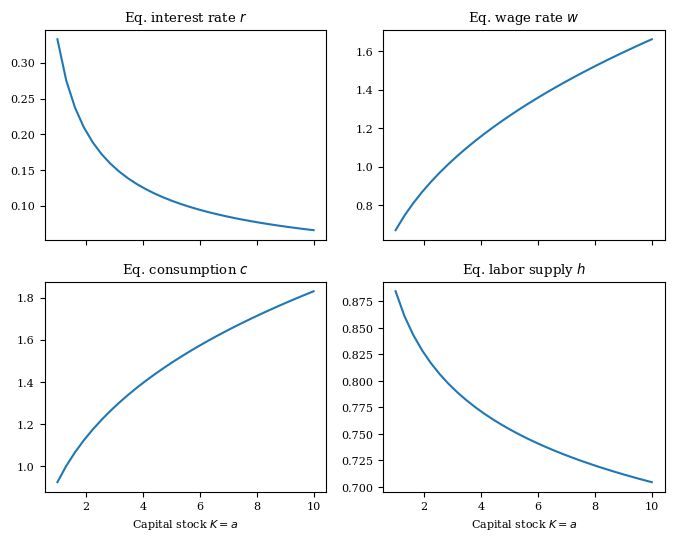

In [19]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(2, 2, figsize=(8,6), sharex=True)

ax[0, 0].plot(a_grid, r_eq_grid)
ax[0, 0].set_title('Eq. interest rate $r$')

ax[0, 1].plot(a_grid, w_eq_grid)
ax[0, 1].set_title('Eq. wage rate $w$')

ax[1, 0].plot(a_grid, c_eq_grid)
ax[1, 0].set_xlabel('Capital stock $K = a$')
ax[1, 0].set_title('Eq. consumption $c$')

ax[1, 1].plot(a_grid, h_eq_grid)
ax[1, 1].set_xlabel('Capital stock $K = a$')
ax[1, 1].set_title('Eq. labor supply $h$')

As the graphs show, the equilibrium interest rate $r$ is decreasing in $K$, which follows directly from the firm's first-order condition, while the wage $w$ is increasing. Despite the increase in wages, the labor supply drops as a function of $K$. This is because with a risk-aversion of $\gamma = 2$, the income effect of wage increases dominates and households thus reduce labor supply. 

***
## Overlapping-generations model

In previous lectures, we studied a simple two-period consumption-savings problem
in *partial equilibrium*. This can be taken to a general-equilibrium setting 
if we assume that at each point in time there are two generations alive,
one young and one old.
Additionally, we extend the model with the same production sector that we introduced 
in the previous example, i.e., perfectly competitive firms 
with Cobb-Douglas technology which use capital $K$ and labor $L$.
Unlike in the previous example, we now study a setting with
*endogenous* capital which arises from the households' savings decision,
but we fix labor supply to be exogenous.

### Household problem

At each point in time, the economy is populated by $N$ identical young and 
$N$ identical old household. Without loss of generality, we can set $N=1$.
Each cohort solves the same household problem as we had before,
$$
\begin{aligned}
\max_{c_y,~c_o,~a} \enskip & \Bigl\{ u(c_y) + \beta u(c_o) \Bigr\} \\
\text{s.t.} \quad c_y + a &= w \\
                  c_o &= (1+r)a \\
    c_y &\geq 0, ~ c_o \geq 0,~ a \geq 0
\end{aligned}
$$
where $\beta$ is the discount factor,
$r$ is the interest rate, $w$ is the wage income received when young, $a$ are savings by the young, 
and $(c_y,c_o)$ is the optimal consumption allocation
when young and old. 
Per-period utility $u(c)$ is the CRRA utility function given by
$$
u(c) = \begin{cases}
    \frac{c^{1-\gamma}}{1-\gamma} & \text{if } \gamma \neq 1 \\
    \log(c) & \text{if } \gamma = 1
    \end{cases}
$$
where $\gamma$ is the RRA coefficient and $\log(\bullet)$ denotes
the natural logarithm.

We assume that the household inelastically supplies one unit of labor when 
young, therefore $w$ is both the wage rate and their labor income.
We impose that the household does not work when old, and it therefore
needs to rely on its savings to finance consumption.

### Firm problem


The firm problem is unchanged from what we had earlier and is summarized here for convenience.
Firms produce output using Cobb-Douglas technology
$$
Y = z K^{\alpha} L^{1-\alpha}
$$
and maximize profits according to
$$
\max_{K,~L} \enskip \Pi = z K^{\alpha} L^{1-\alpha} - r K - w L
$$
The solution is characterized by the firm's first-order conditions
$$
\begin{aligned}
r &= \alpha z \left(\frac{K}{L}\right)^{\alpha-1} = \alpha z k^{\alpha-1} \\
w &= (1-\alpha) z\left(\frac{K}{L}\right)^{\alpha} = (1-\alpha) z k^{\alpha}
\end{aligned}
$$
where we define the capital-labor ratio as $k \equiv \frac{K}{L}$.
We'll use these conditions in the numerical solution below.



### Equilibrium

The general equilibrium in this economy is a set of quantities $(K,L,Y,c_o,c_y,a)$ and prices $(r,w)$ 
which solve the household's and firm's problem
such that the following market clearing conditions are satisfied:

- Asset market: $K = N\cdot a$ (aggregate savings $N \cdot a$ supplied by households equal capital $K$ demanded by firms).
- Labor market: $L = N$ (Labor $L$ demanded by firms equals exogenously supplied labor by households).
- Goods market: $Y = N(c_y + c_o)$ (the amount of goods consumed by young and old each period equals aggregate output).

Due to Walras' Law, we only have to make sure that two of these markets clear as 
this implies market clearing in the residual market. 


### Numerical solution


#### Some useful analytical results

To solve the problem numerically, we explore an alternative approach to what we did in the previous section where we ran a minimizer in each iteration of the equilibrium root-finder to solve the household problem. Now we'll use the household's 
first-order conditions to find an analytical expression for savings $a$ so we don't have to
run a minimizer.

Recall from the previous lecture that the solution to the two-period savings
problem is
$$
c_y = \frac{1}{1 + \beta (1+r)^{\frac{1}{\gamma} - 1}} w
$$
which can be derived by combining the Euler equation and the first-period
budget constraint and solving for $c_y$.
If we define $s$ as the savings rate when young
(i.e., the fraction of income saved), this can be written as
$$
c_y = (1-s) w
$$
where
$$
s = \frac{1}{1 + \beta^{-\frac{1}{\gamma}} (1+r)^{1-\frac{1}{\gamma}}}
$$
and consequently, savings are given by
$$
a = s\cdot w
$$
We'll use this expression to compute capital supply by households 
for a given interest rate.

#### Solution algorithm

The structure of the solution algorithm is similar to the previous section. This time, we opt to find the equilibrium capital-labor ratio $k = \frac{K}{L}$, but we could have just as well opted to iterate over one of the equilibrium prices $r$ or $w$.

The implementation to find the general equilibrium proceeds as follows:

1.  Implement a function $f(k)$ which returns the excess demand for capital if the 
    conjectured capital-labor ratio is $k$.
3.  Call a root-finder to locate the root of $f$.
4.  The root-finder will repeatedly call $f$. For each invocation of $f$ with the current guess of $k$,

    1. Compute the prices $(r,w)$ implied by $k$ that satisfy the firm's first-order conditions
        stated above.
    2. Compute household savings given $(r, w)$ using the savings formula derived above.
    3.  Compute the excess capital demand $K - Na$ as the return value of $f$.
5.  Once the root-finder terminates and returns the equilibrium $k$,
    compute and store all other equilibrium quantities and prices.

#### Implementation

The full implementation is provided in the file [`lecture06_olg.py`](lecture06_olg.py).
For expositional convenience, the following code segments replicate selected code blocks from that file.

We define a 
[`data class`](https://docs.python.org/3/library/dataclasses.html)
called `Parameters` to store the problem parameters. In theory, we could 
have repurposed the `Parameters` class introduced in the previous section for this purpose,
but since the problems have slightly different parameters, it is cleaner to create one from scratch.

In [20]:
from dataclasses import dataclass

@dataclass
class Parameters:
    """
    Parameters for the overlapping generations model.
    """
    alpha: float = 0.36     # Capital share in production function
    z: float = 1.0          # TFP 
    beta: float = 0.96      # Discount factor
    gamma: float = 2.0      # RRA in utility
    N: int = 1              # Number of households per cohort  


The root-finder will ask us to evaluate excess capital demand for each conjectured $k$. First, we implement the following function to map $k$ to factor prices $r$ and $w$ using the firm's first-order conditions.

In [21]:
def compute_prices(k, par: Parameters):
    """
    Return the solution to the firm's problem for given return on capital 
    and parameters.

    Parameters
    ----------
    k : float
        Capital-labor ratio
    par : Parameters
        Parameters for the given problem

    Returns
    -------
    r : float
        Return on capital
    w : float
        Wage rate

    """

    # Return on capital
    r = par.alpha * par.z * k**(par.alpha - 1)

    # Wage rate
    w = (1-par.alpha) * par.z * k**par.alpha
    
    return r, w

The last building block required for the root-finder is the solution to the household problem.
We define the following function which returns the household's optimal savings rate
given $r$:

In [22]:
def compute_savings_rate(r, par: Parameters):
    """
    Compute the savings rate using the analytical solution
    to the household problem.

    Parameters
    ----------
    r : float
        Return on capital
    par : Parameters
        Parameters for the given problem

    Returns
    -------
    s : float
        Savings rate
    """

    s = 1/(1 + par.beta**(-1/par.gamma) * (1+r)**(1-1/par.gamma))

    return s

We can now combine the results from these functions to compute excess demand for capital. We implement the following function to do that which will be called by the root-finder.

In [23]:
def compute_capital_ex_demand(k, par: Parameters):
    """
    Compute the excess demand for capital.

    Parameters
    ----------
    k : float
        Capital-labor ratio
    par : Parameters
        Parameters for the given problem

    Returns
    -------
    ex_demand : float
        Excess demand for capital
    """
    
    # Compute prices from firm's FOCs
    r, w = compute_prices(k, par)

    # Compute savings rate
    srate = compute_savings_rate(r, par)

    # Aggregate supply of savings by households (savings)
    A = srate * w * par.N

    # Aggregate labor supply
    L = par.N

    # Aggregate capital demand
    K = k * L

    # Excess demand for capital
    ex_demand = K  - A

    return ex_demand

To solve the problem, we first create an instance of the problem parameters:

In [24]:
# Create parameter instance
par = Parameters()

<div class="alert alert-info">
<h3> Your turn</h3>

Using the code we just wrote, plot the function <tt>compute_capital_ex_demand()</tt> for 50 points of 
<tt>k</tt> which are uniformly spaced on the interval [0.01, 1].

</div>

We can now test the code by calling the root-finder. We opt to use the default `'brentq'` method, but could just as well have opted for a Newton-based algorithm.

In [25]:
from scipy.optimize import root_scalar

# Initial bracket for k used by root-finder
bracket = (1.0e-3, 10)

res = root_scalar(
    compute_capital_ex_demand, bracket=bracket, args=(par, )
)


Inspecting the result return by the root-finder show that the algorithm terminated successfully.

In [26]:
res

      converged: True
           flag: converged
 function_calls: 14
     iterations: 13
           root: 0.11175097268785739
         method: brentq

The module 
[`lecture06_olg.py`](lecture06_olg.py)
implements two additional convenience functions
`compute_olg_equilibrium()` and `print_olg_equilibrium()` which 
compute and print the equilibrium allocation for a set of parameters.
We can use these to print all equilibrium quantities and prices:


In [27]:
from lecture06_olg import compute_olg_equilibrium, print_olg_equilibrium

# Compute equilibrium, return OLGEquilbrium instance 
eq = compute_olg_equilibrium(par)

# Print equilibrium allocation & prices
print_olg_equilibrium(eq)

Equilibrium:
  Households:
    c_y = 0.17902
    c_o = 0.27531
    a = 0.11175
  Firms:
    K = 0.11175
    L = 1.00000
    Y = 0.45433
  Prices:
    r = 1.46360
    w = 0.29077
  Market clearing:
    Capital market: 1.08247e-15
    Goods market: -1.55431e-15


<div class="alert alert-info">
<h3> Your turn</h3>

You are interested in how the equilibrium prices depend on the cohort size <i>N</i>. Plot the equilibrium prices <i>r</i> and <i>w</i> when varying <i>N</i> over the range of integers from 1 to 10.

</div>